In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
path='features.xlsx' 
abc=pd.read_excel(path,header=None)
abc.head()
abc.drop(abc.columns[0], axis=1)

,1,2,3,4,5,6
0,contrast,dissimilarity,homogeneity,ASM,energy,Label
1,12769357,562393,2747.88,312782,559.269,0
2,9580203,482361,3308,289038,537.623,0
3,10928946,517098,3084.55,337650,581.077,0
4,12465011,556457,2776.65,372854,610.618,0
5,6088850,375354,4293.16,371518,609.523,0
6,11073274,521946,3033.81,293212,541.491,0
7,5577765,364307,4325.82,398904,631.588,0
8,9717543,491453,3150.07,462704,680.223,0
9,5122030,349224,4554.39,483520,695.356,0


In [11]:
X=np.array((abc.as_matrix())[1:,1:])
Y=X[:,5]
X=X[:,0:5]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

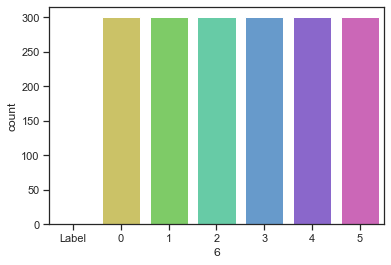

In [13]:
sns.countplot(x = 6, data = abc, palette = 'hls')
plt.show()

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred=logreg.predict(X_test)

In [18]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[55,  0,  0,  2,  0,  0],
       [ 0, 46,  0,  3,  0,  4],
       [26,  0, 37,  5,  0,  0],
       [ 3, 15,  7, 30,  6,  1],
       [ 0,  0,  0,  1, 52,  0],
       [ 0,  7,  0,  4,  0, 56]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

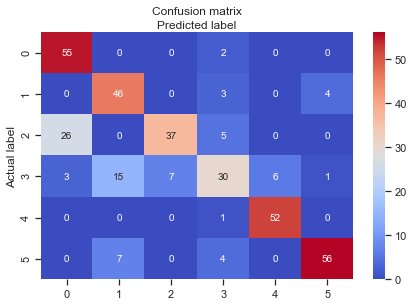

In [19]:
class_names=[0,1,2,3,4,5]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')